<a href="https://colab.research.google.com/github/lskahic/Deep-Learning/blob/main/Midterm_Skahic_Lejla.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Celebrity Facial Classification

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
data_path = '/content/drive/MyDrive/celebs/'

In [ ]:
import os
import numpy as np
import pandas as pd
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
import matplotlib.pyplot as plt


In [ ]:
# Create an instance of ImageDataGenerator for preprocessing
datagen = ImageDataGenerator(
    rescale=1./255,       # Normalize pixel values to be between 0 and 1
    rotation_range=20,    # Randomly rotate images by up to 20 degrees
    width_shift_range=0.1, # Randomly shift images horizontally by up to 10% of the width
    height_shift_range=0.1, # Randomly shift images vertically by up to 10% of the height
    horizontal_flip=True,  # Randomly flip images horizontally
    validation_split=0.2   # Split data into training and validation sets
)

# Generate batches of augmented data
train_generator = datagen.flow_from_directory(
    data_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical', # Assuming you have multiple classes
    subset='training'
)

validation_generator = datagen.flow_from_directory(
    data_path,
    target_size=(224, 224),
    batch_size=32,
    class_mode='categorical',
    subset='validation'
)

Found 1464 images belonging to 18 classes.
Found 366 images belonging to 18 classes.


In [ ]:
model = Sequential([
    Conv2D(32, (3,3), activation='relu', input_shape=(224, 224, 3)),
    MaxPooling2D((2, 2)),
    Conv2D(64, (3,3), activation='relu'),
    MaxPooling2D((2, 2)),
    Conv2D(128, (3,3), activation='relu'),
    MaxPooling2D((2, 2)),
    Flatten(),
    Dense(128, activation='relu'),
    Dense(18, activation='softmax')
])

# Compile and train the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(
    train_generator,
    steps_per_epoch=len(train_generator),
    validation_data=validation_generator,
    validation_steps=len(validation_generator),
    epochs=10
)

Epoch 1/10
46/46 [==============================] - 625s 13s/step - loss: 2.8974 - accuracy: 0.1004 - val_loss: 2.8006 - val_accuracy: 0.1120
Epoch 2/10
46/46 [==============================] - 29s 626ms/step - loss: 2.7340 - accuracy: 0.1366 - val_loss: 2.6996 - val_accuracy: 0.1393
Epoch 3/10
46/46 [==============================] - 29s 627ms/step - loss: 2.6420 - accuracy: 0.1612 - val_loss: 2.4752 - val_accuracy: 0.2022
Epoch 4/10
46/46 [==============================] - 28s 620ms/step - loss: 2.5342 - accuracy: 0.1721 - val_loss: 2.4151 - val_accuracy: 0.2104
Epoch 5/10
46/46 [==============================] - 28s 617ms/step - loss: 2.3976 - accuracy: 0.2063 - val_loss: 2.1773 - val_accuracy: 0.2760
Epoch 6/10
46/46 [==============================] - 28s 617ms/step - loss: 2.3425 - accuracy: 0.2404 - val_loss: 2.1780 - val_accuracy: 0.2951
Epoch 7/10
46/46 [==============================] - 28s 608ms/step - loss: 2.2467 - accuracy: 0.2684 - val_loss: 2.1058 - val_accuracy: 0.2842


In [ ]:
# Extract the training history
train_accuracy = history.history['accuracy']
val_accuracy = history.history['val_accuracy']
epochs = range(1, len(train_accuracy) + 1)


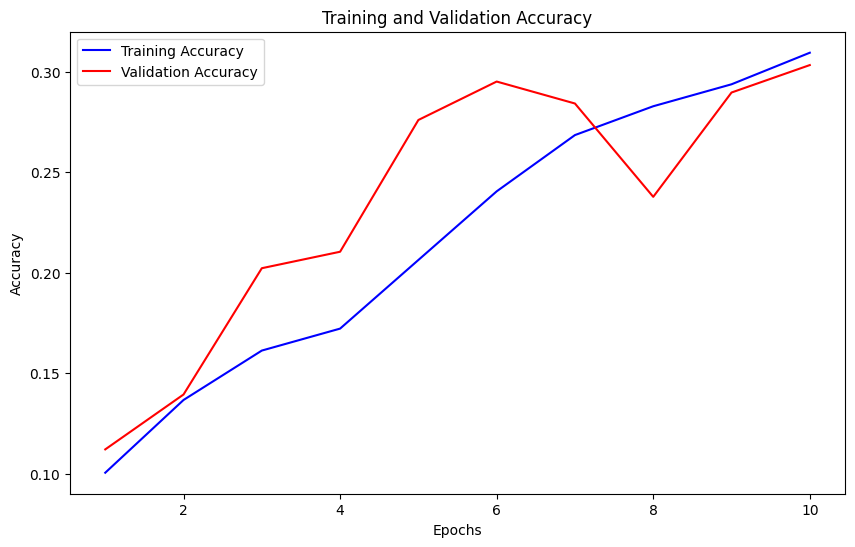

In [ ]:
# Plotting the accuracy
plt.figure(figsize=(10, 6))
plt.plot(epochs, train_accuracy, 'b', label='Training Accuracy')
plt.plot(epochs, val_accuracy, 'r', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()
plt.show()

In [ ]:
predictions = model.predict(validation_generator)

12/12 [==============================] - 5s 403ms/step


In [ ]:
predicted_labels = np.argmax(predictions, axis=1)

In [ ]:
num_samples = 5
accurate_predictions = []
inaccurate_predictions = []

for i in range(num_samples):
    true_label = validation_generator.classes[i]
    predicted_label = predicted_labels[i]

    if true_label == predicted_label:
        accurate_predictions.append((i, true_label, predicted_label))
    else:
        inaccurate_predictions.append((i, true_label, predicted_label))


In [ ]:
import matplotlib.pyplot as plt
from tensorflow.keras.preprocessing import image

def display_image_with_labels(index, true_label, predicted_label):
    img_path = validation_generator.filepaths[index]
    img = image.load_img(img_path, target_size=(224, 224))
    plt.imshow(img)
    plt.axis('off')
    plt.title(f'True: {true_label}, Predicted: {predicted_label}')

In [ ]:
for index, true_label, predicted_label in accurate_predictions:
    plt.figure(figsize=(5, 5))
    display_image_with_labels(index, true_label, predicted_label)
    plt.show()

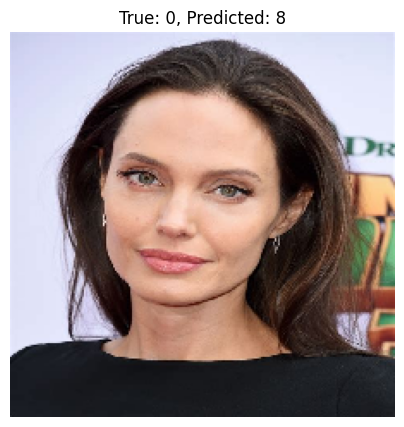

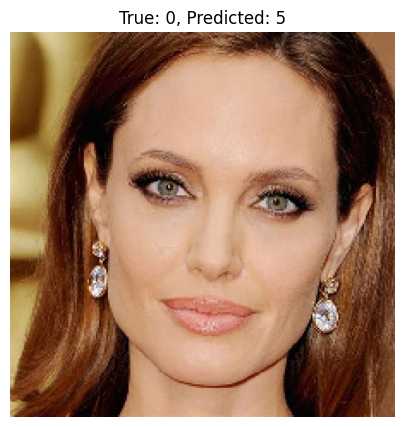

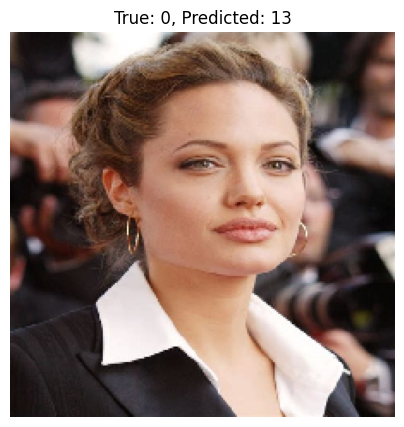

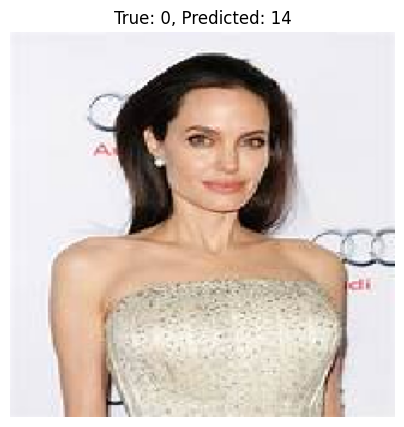

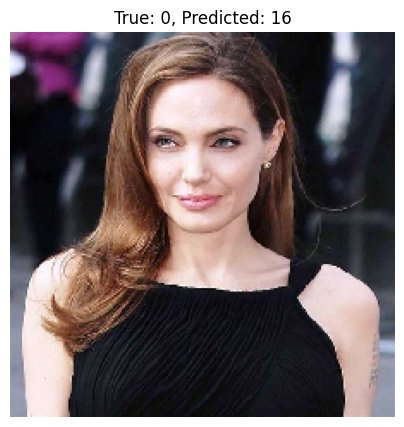

In [ ]:
for index, true_label, predicted_label in inaccurate_predictions:
    plt.figure(figsize=(5, 5))
    display_image_with_labels(index, true_label, predicted_label)
    plt.show()

In [ ]:
# Get the mapping of class indices to class names
class_mapping = validation_generator.class_indices

# Reverse the mapping to get class names to class indices
class_mapping = {v: k for k, v in class_mapping.items()}

# Print the class names and their corresponding labels
for label, celebrity in class_mapping.items():
    print(f"Label {label}: {celebrity}")


Label 0: Angelina Jolie
Label 1: Brad Pitt
Label 2: Denzel Washington
Label 3: Harry Styles
Label 4: Hugh Jackman
Label 5: Jennifer Lawrence
Label 6: Johnny Depp
Label 7: Kate Winslet
Label 8: Leonardo DiCaprio
Label 9: Megan Fox
Label 10: Natalie Portman
Label 11: Nicole Kidman
Label 12: Robert Downey Jr
Label 13: Sandra Bullock
Label 14: Scarlett Johansson
Label 15: Tom Cruise
Label 16: Tom Hanks
Label 17: Will Smith
